## Modèle GARCH

In [5]:
!pip install arch
!wget -q https://raw.githubusercontent.com/Undeavor/PE28/main/CREDITAGRICOLESA_2025-10-05.txt -O myfile.txt

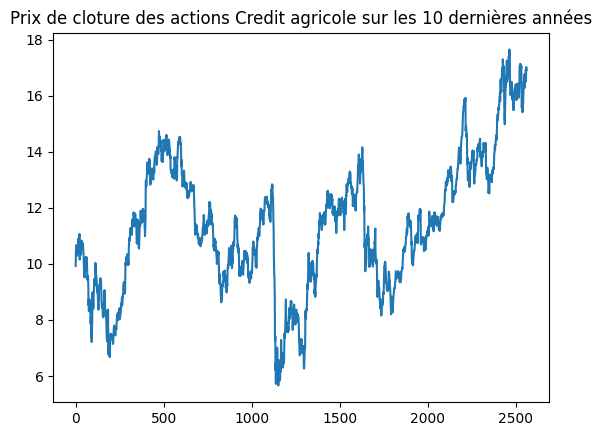

In [6]:
from arch import arch_model
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
from pylab import rcParams

df = pd.read_csv("/content/myfile.txt", sep="\t",usecols=["date", "ouv", "haut", "bas", "clot", "vol", "devise"], parse_dates=["date"])

#print(df.head())
plt.plot(df.clot)
plt.title('Prix de cloture des actions Credit agricole sur les 10 dernières années')
plt.show()

Ici pas de dividendes ( on ne sait pas comment les telecharger sur boursorama )

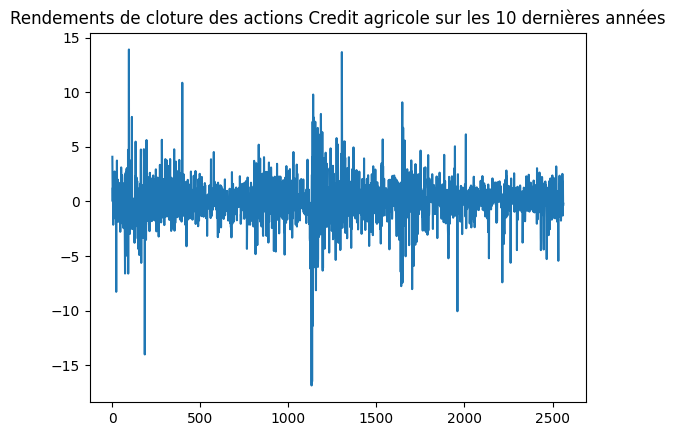

In [7]:
# Calculate daily returns as percentage price changes
df['Return'] = 100 * (df['clot'].pct_change())

#print(df['Return'].head())
#print(df['Return'].tail(50))
#plt.plot(df.Return)[-50:])
plt.plot(df.Return)
plt.title('Rendements de cloture des actions Credit agricole sur les 10 dernières années')
plt.show()

In [11]:
#Choix 1:
returns = df.Return

#Choix 2:
#returns = df.Return[:1350] #changement de point de référence : ici des données localement beaucoup plus volatiles

returns = returns.replace([np.inf, -np.inf], np.nan)
returns = returns.dropna()

In [9]:
am = arch_model(returns, mean='zero', vol='Garch', p=1, q=1)
res = am.fit(disp='off')
print(res.summary())


                       Zero Mean - GARCH Model Results                        
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4957.64
Distribution:                  Normal   AIC:                           9921.28
Method:            Maximum Likelihood   BIC:                           9938.82
                                        No. Observations:                 2561
Date:                Thu, Oct 09 2025   Df Residuals:                     2561
Time:                        21:49:53   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0889  4.029e-02      2.205  2.744e-02 [9.881e-0

In [10]:
# Make 5-period ahead forecast
forecast = res.forecast(horizon = 5)

print(forecast.variance[-1:])

           h.1       h.2       h.3       h.4       h.5
2561  2.082907  2.117684  2.151558  2.184553  2.216692


## différentes variantes du modèle GARCH

## Traitement des hautes fréquences